In [1]:
from dataset import load_ddsm_data

X_train, Y_train, X_valid, Y_valid, X_test, Y_test = load_ddsm_data(data_dir='./data/benign_malignant', \
    label_json='./data/mass_to_label.json', validation_set=True)

loading in 926 images...
loading in 177 images...
loading in 292 images...


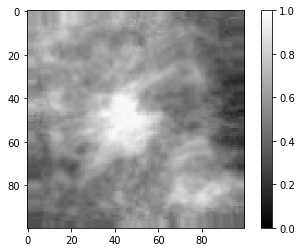

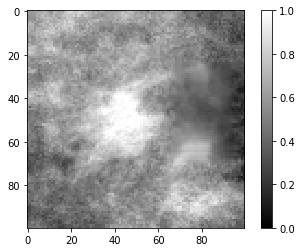

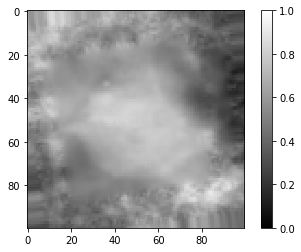

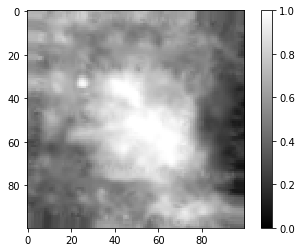

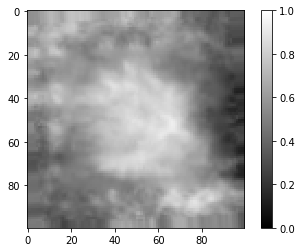

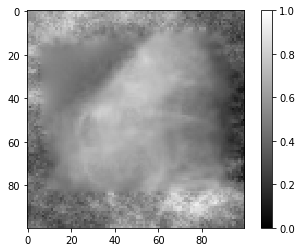

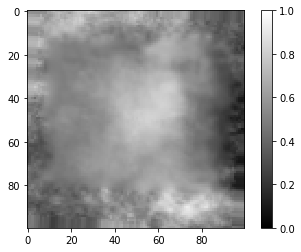

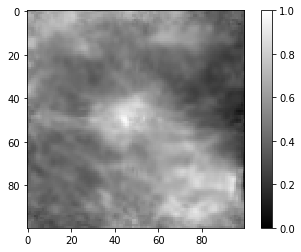

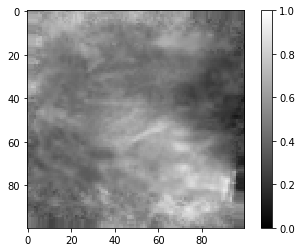

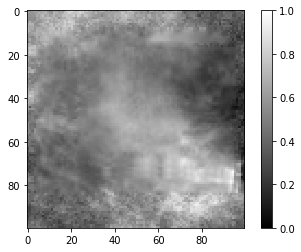

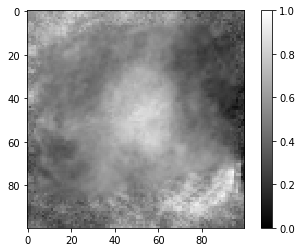

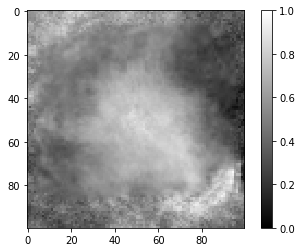

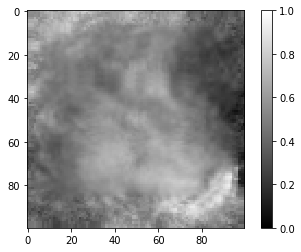

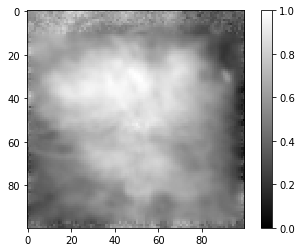

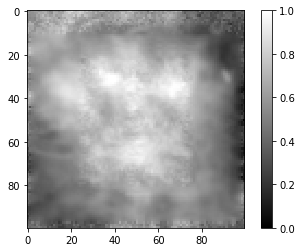

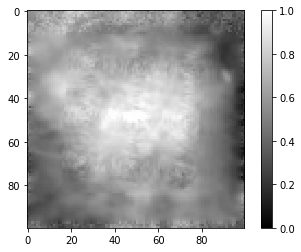

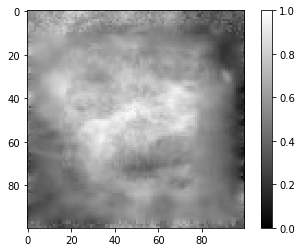

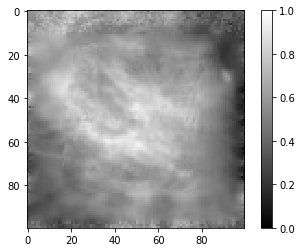

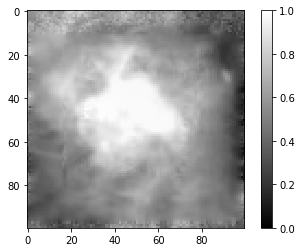

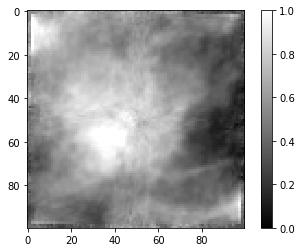

In [12]:
from tanda.transformer import SegmentTransformer 
from tanda.discriminator import (
    DCNN, GenericImageCNN, TextDiscriminator, ResNetDefault
)
from tanda.generator import (
    GRUGenerator, LSTMGenerator, MCGenerator, MeanFieldGenerator
)
from tanda.tan import PGTAN
from experiments.tfs.image import *
from experiments.tfs.image.mammo_tfs import *
from experiments.utils import *
# from utils import parse_config_str, attach_debug_op

from functools import partial 
from itertools import chain
import os
import sys
import matplotlib.pyplot as plt

dims     = [100, 100, 2]

X_batch = X_train[80:100]
X_plot = X_batch 

tf_sets = []
tfs_0 = [
    [partial(TF_rotate, angle=p) for p in [2.5, -2.5, 5, -5]],
    [partial(TF_zoom, scale=p) for p in [0.9, 1.1]],
    [partial(TF_enhance_contrast, p=p) for p in [1.15, 1.05]],
    [partial(TF_blur, sigma=0.1)],
    [partial(TF_translate_structure_with_tissue, translation=p, dim=100) \
        for p in [(10,10), (-10,-10), (5,10), (-10,5)]],
    [partial(TF_translate_structure_with_tissue, dim=100)], 
    [partial(TF_rotate_structure_with_tissue, p=p, dim=100) \
        for p in [2.5, -2.5, 15, -15]]
]
tf_sets.append(list(chain.from_iterable(tfs_0)))

tfs_1 = [
    [partial(TF_rotate, angle=p) for p in [2.5, -2.5, 5, -5]],
    [partial(TF_zoom, scale=p) for p in [0.98, 1.02]],
    [partial(TF_enhance_contrast, p=p) for p in [0.95, 1.05]],
    [partial(TF_translate_structure_with_tissue, translation=p, dim=100) \
         for p in [(0,3), (0,-3), (3,0), (-3,0), (0,0)]],
#     [partial(TF_translate_structure_with_tissue, dim=100, translation=(0,0))],
    [partial(TF_rotate_structure_with_tissue, p=p, dim=100) \
        for p in [2.5, -2.5, 5, -5]],
#     [partial(TF_rotate_structure_with_tissue, num_pixels=5, dim=100)]
]
tf_sets.append(list(chain.from_iterable(tfs_1)))

tfs = tf_sets[1]

# gen_config = {
#     "model" : "gru",
#     "config" : {
#         "n_stack": 1,
#         "feed_actions": True,
#         "init_type": "train"
#     }
# }

transformer = SegmentTransformer(tfs, dims)
# K = transformer.n_actions 
seq_len = 7
# G = GRUGenerator(K, seq_len, **parse_config_str(""))
# D = DCNN(dims=dims)
mse_layer = None

# tan = PGTAN(D, G, transformer, 1e-3, 1e-4, mse_term=1e-4, \
#             mse_layer=mse_layer, split_data=False, gamma=0.5, per_img_std=False, train_disc=True)


X_plot_r = transformer.random_transform(X_plot, seq_len, emit_incremental=False)
# X_plot_r = tan.transformer.random_transform(X_plot, seq_len, emit_incremental=False)
X_plot_r = np.reshape(X_plot_r, [20,dims[0],dims[1],1])

for i in xrange(20):
    plt.figure()
    plt.imshow(np.squeeze(X_plot_r[i]), cmap='gray')
    plt.colorbar()
    plt.clim(0,1)
    plt.show()